# Aula 02 - Visualização de Dados

# Exercício 01:

Em determinadas épocas do ano a venda de certos produtos sofre um aumento significativo. Um exemplo disso, são as vendas de sorvete que aumentam bastante no verão. Além do sorvete, outros itens como protetor solar e vestuário de banho podem ganhar maior atenção durante essa época do ano enquanto outros produtos podem não ser tão valorizados. Pensando nisso, crie uma função que, dado duas listas com as quantidades de produtos vendidos ao longo dos 12 meses do ano, crie um gráfico de barras ou linhas mostrando a evolução das vendas dos produtos ao longo dos meses em porcentagem. Ou seja, um gráfico relacionando a porcentagem de produtos vendidos naquele mês em relação ao ano como um todo para as vendas de sorvetes, óculos de sol e casacos.


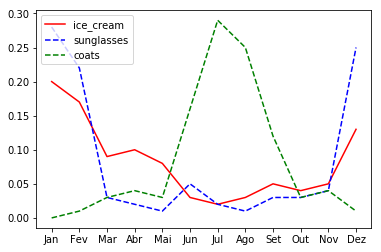

In [26]:

from matplotlib import pyplot as plt
import numpy as np
import math

#Exemplo:
ice_cream = [3000, 2600, 1400, 1500, 1200, 500, 300, 400, 700, 600, 800, 1900]
sunglasses = [1000, 800, 100, 70, 50, 190, 60, 50, 100, 120, 130, 900]
coats = [10, 20, 80, 120, 100, 500, 900, 780, 360, 100, 120, 20]
labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

def bar_or_lines(list1, list2, list3):
    
    products = list(zip(ice_cream,sunglasses,coats))
    total_ice_cream,total_sunglasses,total_coats = [0],[0],[0]
 
    for ice, sung,coat in products : 
        total_ice_cream[0] += ice
        total_sunglasses[0]+=sung
        total_coats[0] += coat
        
    total_produts = list(*zip(total_ice_cream,total_sunglasses,total_coats))
    
    np_products =  np.array(products)
    np_total = np.array(total_produts)
    np_percent =  np.array(products).astype(np.float)
    #print (np_percent)
    
    np.set_printoptions(precision=3,suppress=True)
    
    np_percent[:,0] = (np_products[:,0] / np_total[0]).astype(float)
    np_percent[:,1] = (np_products[:,1] / np_total[1]).astype(float)
    np_percent[:,2] = (np_products[:,2] / np_total[2]).astype(float)
    
    
    
    fig = plt.figure()
    plt.plot(labels, np.round(np_percent[:,0],2), 'r-', label="ice_cream")
    plt.plot(labels, np.round(np_percent[:,1],2), 'b--', label="sunglasses");
    plt.plot(labels, np.round(np_percent[:,2],2), 'g--', label="coats");
    plt.legend(loc=2)
    plt.show()
    

bar_or_lines(ice_cream, sunglasses, coats)


# Exercício 02:

Utilizando os mesmos dados do exercício anterior, crie uma função que, dado duas listas com as quantidades de produtos vendidos ao longo dos 12 meses do ano, crie um gráfico de dispersão mostrando a correlação entre as vendas dos dois produtos. Como exemplo, gere três gráficos, a partir das três listas que são dadas. Ou seja, um gráfico relacionando as vendas de sorvetes e óculos de sol, outro relacionando as vendas de sorvetes e casacos e, por fim, um relacionando as vendas de óculos de sol e casacos. Em seguida, discuta sobre os gráficos encontrados no sentido de encontrar uma relação entre as vendas.


__Dicas:__  
"_Correlação não é o mesmo que causalidade!_"


In [ ]:

print("Vendas de sorvete e 'oculos de sol'")
scatter(np.round(np_percent[:,0],2), np.round(np_percent[:,1],2),'Sorvete','Oculos')
print("Vendas de sorvete e casacos")
scatter(np.round(np_percent[:,0],2), np.round(np_percent[:,2],2),'Sorvete','Casacos')
print("Casacos e oculos de sol")
scatter(np.round(np_percent[:,2],2), np.round(np_percent[:,1],2),'Casacos','Oculos')

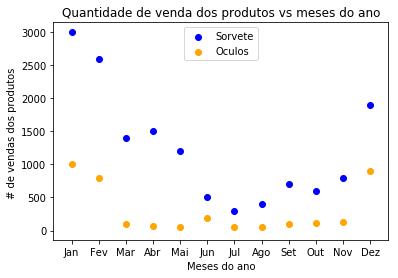

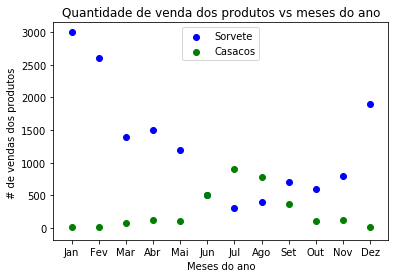

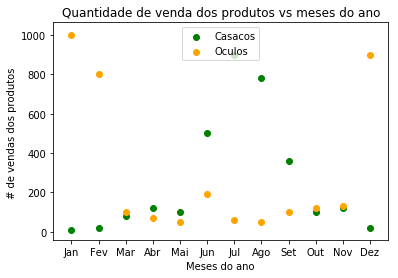

In [45]:
from matplotlib import pyplot as plt

def scatter(list1, list2,label1='',label2='',color1='blue',color2='orange'):
    labels = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
     
    plt.scatter(labels,list1, label=label1,color=color1)    
    plt.scatter(labels,list2, label=label2,color=color2)
    plt.title("Quantidade de venda dos produtos vs meses do ano")
    plt.xlabel("Meses do ano")
    plt.ylabel("# de vendas dos produtos ")
    plt.legend(loc=9)
    plt.show()

scatter(ice_cream, sunglasses,'Sorvete','Oculos','blue','orange')
scatter(ice_cream, coats,'Sorvete','Casacos','blue','green')
scatter(coats, sunglasses,'Casacos','Oculos','green','orange')

__Discuta sobre os resultados obtidos:__

E poss'ivel verificar que, embora com ordem de grandezas diferentes, o sorvete e o oculos de sol tem comportamentos de aumento e diminuicao de venda semelhantes para cada mes do ano. Alem disso, observa-se que o oposto ocorre para o sorvete e os casacos. Os periodos de baixa venda dos casados sao os melhores periodos de venda para o sorvete e vice-versa, apresentando um comportamento de venda inversamente proporcional. O mesmo comportamento inversamente proporcional ocorre com os casacos e os oculos, embora no mes de junho/julho um comportamento de crescimento nas vendas ocorre para os dois produtos, embora com menor intensidade para o caso da venda de oculos. 

Relacionando ainda esses comportamentos de venda com os periodos do ano, parece logico o aumento de sorvetes e oculos de sol nos meses que representam verao para o hemisferio sul (o que faz sentido apenas de esses dados forem de algum local do hemisferio sul). O mesmo para o aumento de compra de casacos no periodo do inverno. Entretanto, uma hipotese interessante a ser colocada para o pequeno aumento das vendas de oculos de sol no mes de junho pode estar relacionado ao aumento de claridade no inverno, se os dados forem de um pais com neve e pessoas de olhos claros. Para validar essas hipoteses, seria necessario a localizacao das vendas efetuadas, bem como caracteristicas climaticas do local. 

PS: Perdao a ausencia de acentos - meu teclado esta com problemas

# Exercício 03:


Crie uma matriz `n x m` com valores aleatórios positivos e negativos e, em seguida, gere um mapa de calor (_Heatmap_) com uma escala de cores gerada de forma que a cor branca represente o 0.


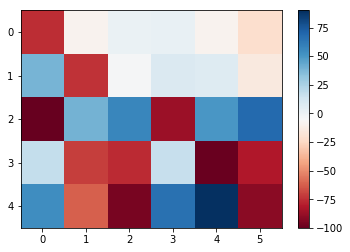

In [39]:
import numpy as np
import matplotlib
import random 

def make_rand_matrix(n,m):
    return [[ random.randrange(-100, 100)             
             for j in range(m)]   
                for i in range(n)]

def heatmap(matrix):
    plt.imshow(matrix,cmap=matplotlib.cm.RdBu)
    plt.colorbar()
    plt.show()

     
heatmap(make_rand_matrix(5,6))